<a href="https://colab.research.google.com/github/nstshirotays/chatapp-shot1/blob/master/%E7%AC%AC%EF%BC%91%E5%9B%9EAI%E5%8B%89%E5%BC%B7%E4%BC%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# パーセプトロン
CPUは論理回路で構成されている。論理回路の組み合わせにより四則演算が実現されている。


## 概要


![論理記号](https://docs.google.com/drawings/d/e/2PACX-1vQ2SKuRbOhYXSsd1vbFCWV3iJzEBX2LUoM6QSHY6jpWt1hiOzBMgbzeRm-Pqs5yS-qdAoZBO57Jxr4G/pub?w=390&h=365)

ニューロコンピューターの研究過程において、この論理演算が生物の脳内で行われていると仮定したモデルがパーセプトロン。

研究者は同一の細胞（ニューロン）が外部のコントロールにより２値（真偽値）を出力すると考察し、下記のようにモデル化した。

![ニューロンモデル](https://docs.google.com/drawings/d/e/2PACX-1vSinEodXTx3n5L_cMTGqzbDcKC1y6ncEjm0vjk5wHCiDPIT476aqJxuNiiniflzJvy0zjylvyEz0vTP/pub?w=302&h=75)


この円形はニューロンを表す。ニューロンへの入力は矢印で表され、それぞれの入力信号に対して重み付けがされる。これらの情報を元にニューロンYは入力データに重みを乗算した値を閾値θと比較して出力を０か１の二値に振り分ける。これを一般化し下記のような構成にしたものがパーセプトロンである。

![パーセプトロン](https://docs.google.com/drawings/d/e/2PACX-1vSpMVD85wOprci70XqNYFpaA3gNI_rTRVezumjEJ6trAHQ6qMq7gPA-PH7bDzHfOkMb-pEKQXxSOvs_/pub?w=302&h=220)

パーセプトロンでは、複数のニューロンからの入力値（X1、X2、、、）にそれぞれの重み（W1、W2、、、、）を掛けた値を合算し、さらに前述のモデルで閾値θを外部からの入力値として引き出す。これをバイアスと改めて再定義し、それらの総合計がゼロ以下であればゼロを、そうでなければ１を結果として出力するというモデルである。

CPUにおける演算素子はそれぞれ固有のデバイスであるが、このパーセプトロンでは信号の重みであるWとバイアス値であるｂの値を工夫することで、ニューロンの構成を変えずにAND、OR、NANDの演算を行うことができる。

この発見により、神経伝達をそのモデルとしたパーセプトロンはコンピューターのCPUと等価と見なせる事となり、人間の脳活動をコンピューターで摸倣できる可能性が示された。



## ANDパーセプトロンの例
X1とX2のAND（論理積）Yは以下の表の通りとなる。

![真理値（AND)](https://docs.google.com/drawings/d/e/2PACX-1vRBDAVLdjYPZdwKgzW7KjJChXCcVpuf2F4BV37uJsMeq9RiKaEOiBm1ku6IWWPfIIAoYMAsXsFP5y4r/pub?w=110&h=104)

これをパーセプトロンで実現する場合は例として下記のように重みWとバイアスｂを設定する。

![ANDパーセプトロン](https://docs.google.com/drawings/d/e/2PACX-1vS0_fzuAskoeaRAzwEG5YW7YVbXQbVppfbPCA64l-KFjYmMjRuCpsCgvR1Y-k2p24j3Ods_0WE_NumA/pub?w=302&h=220)


実際にpythonで実装を行う。





In [0]:
import numpy as np    # 行列演算の為のライブラリの読み込み

#---------------------------
#  論理積を計算する
#---------------------------
def AND(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.7
  result = b + np.sum(w*x)
  if result <= 0:
    return 0
  else:
    return 1
  
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))


0
0
0
1


## ORパーセプトロン
先程のANDパーセプトロンの重みWとバイアスｂを変更することでor（論理和）パーセプトロンも実装できる。

ORパーセプトロンの真偽値は下記の通り

![ORパーセプトロン](https://docs.google.com/drawings/d/e/2PACX-1vT5n56HwMBreq9nmHCYS3rydXTPR3YQRXs62---PUy9PV6hyP6uSNDVN6A63I-KLN3whl6YPsMwCWYP/pub?w=110&h=104)

これをパーセプトロンで実現する場合は例として下記のように重みWとバイアスｂを設定する。
* W1 = 0.5
* W2 = 0.5
* b = -0.2

これを同様にpythonで実装する



In [0]:
#---------------------------
#  論理和を計算する
#---------------------------
def OR(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.2
  result = b + np.sum(w*x)
  if result <= 0:
    return 0
  else:
    return 1
  
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


## アルゴリズムとしてのパーセプトロン
上記と同様にNANDなども表現できる。さらにこれらのパーセプトロンを複数組み合わせることもできる。これにより単層では表現できないXORなどの論理演算も可能となる。

最も重要な点は、このパーセプトロンを構成する一つ一つのニューロンは全て等価であり、単に入力値への重み付けが異なるだけという点である。

よってパーセプトロンではこの重みの値を決定することで演算が可能となり、これは演算アルゴリズムをパーセプトロンの重みで表現しているとも言い換えることができる。



# ニューラルネットワーク
ニューラルネットワークは先のパーセプトロンに改良を加え3層を基本とした構造を持つ。



## 活性化関数の導入
パーセプトロンでは結果の判定を0以下かそれ以外という、判定方法を固定していたが、ニューラルネットワークでは、これを活性化関数として再定義している。

主な活性化関数を下記に示す





### ステップ関数
パーセプトロンで実装されている方式。

評価式の結果がゼロ以下かそれ以外で０、１の二値を返す

ステップ関数をグラフに表示する

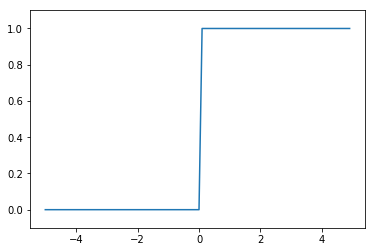

In [0]:
import numpy as np
import matplotlib.pylab as plt

#------------------------
# ステップ関数
#------------------------
def step_function(x):
    return np.array(x > 0, dtype=np.int)

#------------------------
# グラフへの表示
#------------------------
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
plt.show()

### シグモイド関数
ニューラルネットワークで広く用いられる。

![シグモイド関数](https://docs.google.com/drawings/d/e/2PACX-1vSPiq7ffbs0PiyFDXrg93J1t3KdMq0eAnCoVC_JfD62LrszzR9t_4c3U76pF_SvNhDCxeKplvJrBIL_/pub?w=182&h=100)

グラフに表示する。


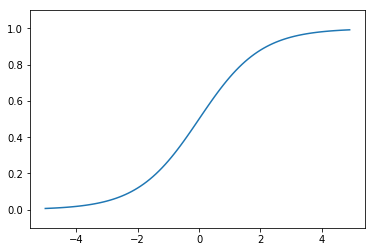

In [0]:
import numpy as np
import matplotlib.pylab as plt

#------------------------
# シグモイド関数
#------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

#------------------------
# グラフへの表示
#------------------------
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

上記のようにシグモイド関数では、結果は２値ではなく０から１までの実数が返却される。

これは出力値を２つに限定したパーセプトロンからの大きな飛躍であり、これにより複雑な（曖昧な）入力と出力が可能となった。

### ReLU関数　（別名：ランプ関数　　ramp func 傾斜関数）
最近のAIではシグモイド関数の代わりに用いられる事が多い。

ReLUは入力値がゼロを超えていればそのまま出力される。



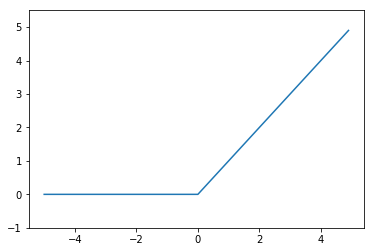

In [0]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt

#------------------------
# ReLU関数
#------------------------
def relu(x):
    return np.maximum(0, x)

#------------------------
# グラフへの表示
#------------------------
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()


## 3層構造の導入
ニューラルネットワークでは、全体のネットワーク構造（ニューロンの繋がり）を３層で定義している。

![ニューラルネットワーク図](https://docs.google.com/drawings/d/e/2PACX-1vRTlX7S4ArrD3-h_abU0ic1cYtrXF4ftjCQxJlyFPI57GERAga_dvDWedCJaHamjS3ZTsBKwgtLGmt1/pub?w=798&h=454)



### 入力層
ニューラルネットワークの入力となる層。

各ニューロンへの値は一つなので、画像を認識しようとすれば、各画素毎の値が入力値となる。

具体的には縦横１６ドットの画像であれば、１６×１６＝２５６の画素で構成されるため、入力層は２５６必要となる。

### 隠れ層
この層がAIにおけるモデルの中心部分であり日々進化を遂げている。


### 出力層
ニューラルネットワークの出力となる層。

手書き数字認識であれば、結果は０から９のいずれかになるので、出力層は１０となる。

なお、対象となる分析が回帰問題（なにかの値に収束する）場合は出力層は一つとなり、その値をもって結果と見なせる。

一方手書き文字認識のような問題は分類問題と呼ばれる。この分類問題の場合における出力層はソフトマックス関数を用いる。



#### ソフトマックス関数
![ソフトマックス関数](https://docs.google.com/drawings/d/e/2PACX-1vSzbhHIZVMWV4YAJgndvhJuHOmPNSNBJYlKqpLh1d0Ffl6Lfbr9HcQcczLk-oWQgYqcno_Mn6TuFAaM/pub?w=185&h=100)

この関数は出力値を全体の合計値で割ることにより、必ず０～１の間における割合を示す。これは擬似的に出力値に対する期待度、信頼度を示しているとも言える。

なお、expをしていることにより、出力値が高い場合はより大きい値をとることで、微細な違いもはっきりと表示する効果を持っている。



## 手書き数字認識の実装
それでは、実際にニューラルネットワークを使って手書き文字認識を実装してみる。


### 推論処理の実装
oreillyのデータを使ってMNISTデータの認識を行う

![MNIST](https://docs.google.com/drawings/d/e/2PACX-1vRmKtGjrW_McthMyjLw9dj_zXxKaZ-Gca_HeNPKumeS7EIZ72ndBVYITGC0VLaRQOcayx97xOt_f40n/pub?w=289&h=173)


In [0]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 404, done.
remote: Total 404 (delta 0), reused 0 (delta 0), pack-reused 404
Receiving objects: 100% (404/404), 5.25 MiB | 34.93 MiB/s, done.
Resolving deltas: 100% (208/208), done.


In [0]:
%cd /content/deep-learning-from-scratch/ch03

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

#-----------------------------
# データの取得
#-----------------------------
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


#-----------------------------
# 定義済みのニューラルネットワークの読み込み
#-----------------------------
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


#-----------------------------
# 推論処理
#-----------------------------
def predict(network, x):
    # 重み配列の読み込み
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    # バイアスの読み込み
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 入力層　-> 隠れ層1　の処理
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    # 隠れ層1　-> 隠れ層2　の処理
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    # 隠れ層2　-> 出力層　の処理
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


#-----------------------------
# メイン処理
#-----------------------------
x, t = get_data()             # 入力データx と正解データt を読み込む
network = init_network()      # 訓練済みの重み、バイアスデータを読み込む
accuracy_cnt = 0

for i in range(len(x)):
    # 一枚ごとに推論処理を行う
    y = predict(network, x[i])
    p= np.argmax(y)           # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        # 正解の場合
        accuracy_cnt += 1

#-----------------------------
# 結果表示
#-----------------------------
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

/content/deep-learning-from-scratch/ch03
Accuracy:0.9352


### バッチ処理の実装
上記の例は６万枚の画像データについて一枚づつ処理を行っている。

numpyなどの科学計算ライブラリは行列計算が高速に行えるようにチューニングされている。このため一般的にはロジックでループ処理を行うより、行列式として一度に計算する量を増やしてやるほうが結果として処理が早くなる。

今回の例では一つの画像データ（画素数分の列データ）を複数画像分まとめて（行列データにして）渡すことで、計算が早くなる。

このまとめる指定を「バッチ（束）」と呼ぶ。

バッチ数を指定した場合のプログラムを下記に示す（結果は変わらない）。

In [0]:

x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


# Deep Learning
ディープラーニングとは４層以上のニューラルネットワークにおける各パラメータ（重み、バイアス）を決定する作業である。



## Learning概要
具体的な処理としては、ある入力値